In [1]:
from torch.utils.data import DataLoader
from torchvision import transforms
import torch
from PIL import Image
import os
from pathlib import Path
from utils import *
from allResNets import *
from engine import *
from data_transforms import create_transform
from dataloaders import *

change_to_disk()
data_dir = Path("Quality/data/split_1k")
models_path = Path('Quality/Models_test/')
check_dir(models_path)

In [2]:
image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]
BATCH_SIZE = 16

data_transform = create_transform(resize=resize, rotate=10, flip_h = True, color_dev=True, transf_tensor=True, normalize=True, sp_noise=True, gauss_noise=True)

train_dl, validation_dl, test_dl, train_data, validation_data, test_data = create_dataloaders_multilabel(data_dir, transform = data_transform, batch_size=BATCH_SIZE, num_workers= NUM_WORKERS)

In [3]:
NUM_EPOCHS = 100
lr = 0.001
device = get_device()

resnet18 = ResNet18()

#Combines the sigmoid with the BinaryCrossEntropy
loss_fn = nn.BCEWithLogitsLoss()

In [4]:
model_name = "ResNet18"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3364 | train_acc: 0.5144 | validation_loss: 0.6066 | validation_acc: 0.4264
Epoch: 2 | train_loss: 0.2818 | train_acc: 0.6124 | validation_loss: 0.3508 | validation_acc: 0.5234
Epoch: 3 | train_loss: 0.2442 | train_acc: 0.6824 | validation_loss: 0.6468 | validation_acc: 0.5339
Epoch: 4 | train_loss: 0.2018 | train_acc: 0.7462 | validation_loss: 0.3402 | validation_acc: 0.6868
Epoch: 5 | train_loss: 0.1715 | train_acc: 0.7887 | validation_loss: 0.1459 | validation_acc: 0.8366
Epoch: 6 | train_loss: 0.1497 | train_acc: 0.8200 | validation_loss: 0.1635 | validation_acc: 0.8496
Epoch: 7 | train_loss: 0.1354 | train_acc: 0.8397 | validation_loss: 1.8396 | validation_acc: 0.3008
Epoch: 8 | train_loss: 0.1235 | train_acc: 0.8497 | validation_loss: 0.1498 | validation_acc: 0.8320
Epoch: 9 | train_loss: 0.1087 | train_acc: 0.8622 | validation_loss: 0.7110 | validation_acc: 0.5391
Epoch: 10 | train_loss: 0.1051 | train_acc: 0.8687 | validation_loss: 0.2538 | validation_a

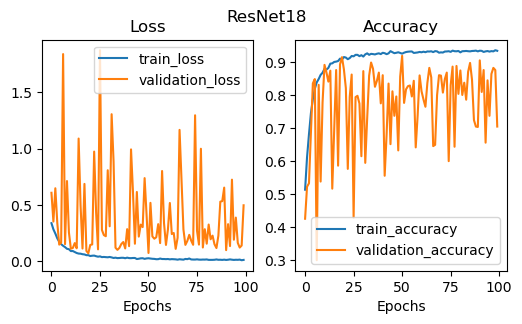

In [8]:
plot_loss_curves(train_resnet18_results,"ResNet18")

In [7]:
resnet18 = load_model(ResNet18,models_path/"ResNet18/ResNet18_100_final.pth",device)
resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Block(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (identity_downsample): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [10]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(16,3,resize[0],resize[1]).to(device))

  0%|          | 0/32 [00:58<?, ?it/s]

In [11]:
eval_resnet18_results

{'model_name': 'ResNet',
 'model_loss': 0.5231509208679199,
 'model_acc': 0.6920572916666666,
 'model_inf_time': 55.32818341255188,
 'std_inf_time': 39.42777361890522}